In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
from skimage import io,img_as_float
import pandas as pd
import math
import rasterio
from rasterio import plot

In [111]:
img=cv2.imread(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 8\ndvinew.jpg',0)

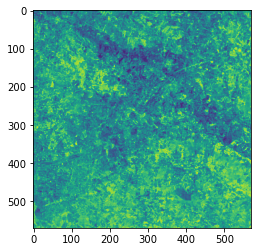

In [112]:
plt.imshow(img)

In [21]:
tiff.imsave(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 8\newimage',img)

In [113]:
#Blur images using default functions:
image_MedianBlur=cv2.medianBlur(img,9)
image_GaussianBlur=cv2.GaussianBlur(img,(9,9),10)
image_blur=cv2.blur(img,(5,5))
image_bilateral= cv2.bilateralFilter(img,10,200,200)

Text(0.5, 1.0, 'image_bilateral')

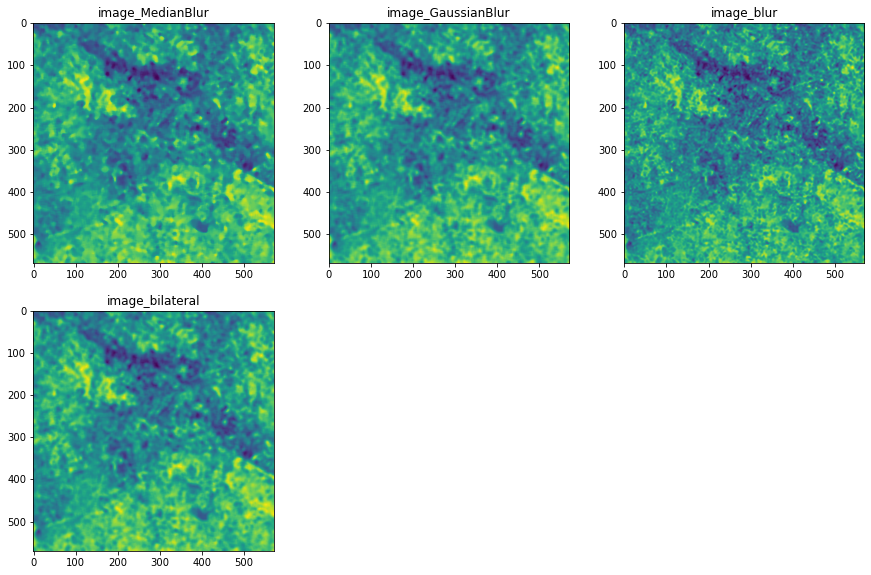

In [121]:
fig = plt.figure(figsize=(15, 15))
  
# setting values to rows and column variables
rows = 3
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(image_MedianBlur)
plt.axis('on')
plt.title("image_MedianBlur")


fig.add_subplot(rows, columns, 2)
plt.imshow(image_GaussianBlur)
plt.axis('on')
plt.title("image_GaussianBlur")

fig.add_subplot(rows, columns, 3)
plt.imshow(image_blur)
plt.axis('on')
plt.title("image_blur")

fig.add_subplot(rows, columns, 4)
plt.imshow(image_bilateral)
plt.axis('on')
plt.title("image_bilateral")

In [122]:
# using convolution
#dataset1=rasterio.open(gray)
img2=r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 8\newimage'
dataset1=rasterio.open(img2)

C:\Users\win\Anaconda3\envs\geo_lib\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


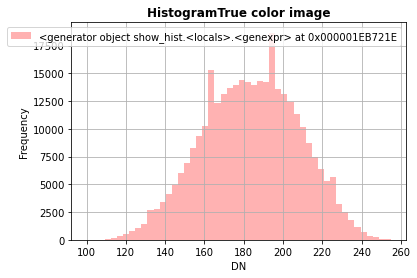

In [123]:
plot.show_hist(dataset1,bins=50,lw=0.0,stacked=False,alpha=0.3,histtype='stepfilled',title="HistogramTrue color image")

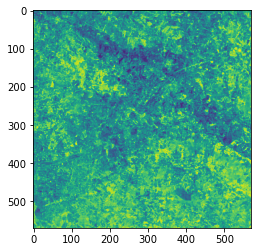

In [124]:
img2=cv2.imread(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 8\ndvinew.jpg')
gray =cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

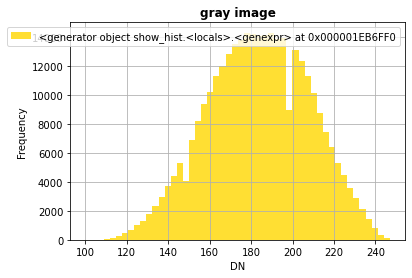

In [127]:
plot.show_hist(gray,bins=50,lw=0.0,stacked=False,alpha=0.8,histtype='stepfilled',title="gray image")

In [128]:
print(gray)

[[140 149 148 ... 191 192 192]
 [129 133 138 ... 192 193 194]
 [136 133 139 ... 178 179 181]
 ...
 [188 179 178 ... 235 232 235]
 [195 179 179 ... 228 197 233]
 [194 179 180 ... 217 186 223]]


In [129]:
smallest = np.amin(gray)
biggest = np.amax(gray)
print(smallest)
print(biggest)

100
247


In [130]:
kernel=np.ones((5,5),np.float32)/25

In [131]:
gaussian_kernel=np.array([[1/16,1/8,1/16],
                         [1/8,1/4,1/8],
                         [1/16,1/8,1/16]])

laplacian_kernel=np.array([[0,1,0],
                         [1,-4,1],
                         [0,1,0]])
# image sharpening 
Sharpening_kernel=np.array([[0,-1,0],
                            [-1,5,-1],
                            [0,-1,0]])

edge=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

#high_pass_filter 5x5
kernel_hp= np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])

In [132]:
# Smoothening filters:
conv_using_cv2=cv2.filter2D(gray,-1,kernel,borderType=cv2.BORDER_CONSTANT)
gaussian_filter=cv2.filter2D(gray,-1,gaussian_kernel,borderType=cv2.BORDER_CONSTANT)
laplacian_filter=cv2.filter2D(gray,-1,laplacian_kernel,borderType=cv2.BORDER_CONSTANT)

# sharpening:
Sharpening_filter=cv2.filter2D(src=gray, ddepth=-1, kernel=Sharpening_kernel)


#Edge detection filters:
edge_filter=cv2.filter2D(gray,-1,edge,borderType=cv2.BORDER_CONSTANT)

#high pass filters
high_pass=cv2.filter2D(gray,-1,kernel_hp,borderType=cv2.BORDER_CONSTANT)

Text(0.5, 1.0, 'high_pass')

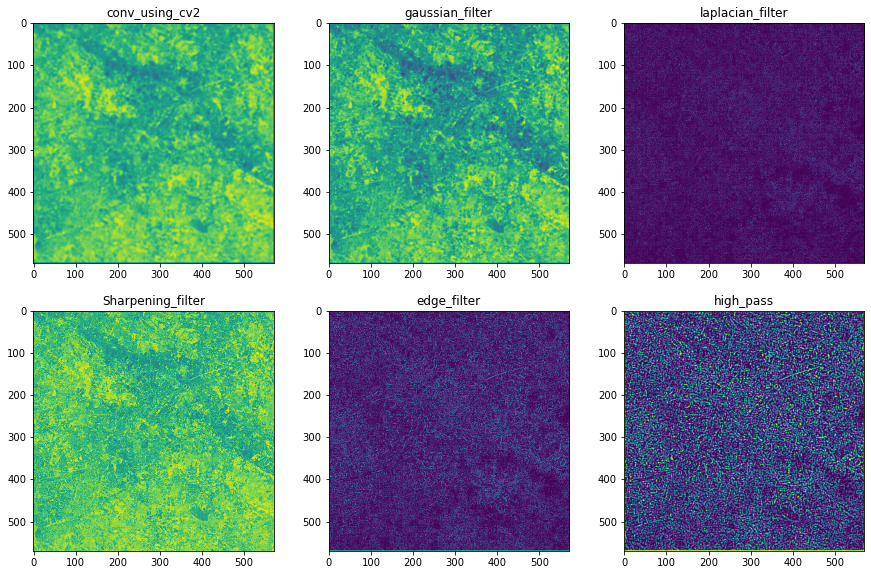

In [133]:

fig = plt.figure(figsize=(15, 15))
  
# setting values to rows and column variables
rows = 3
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(conv_using_cv2)
plt.axis('on')
plt.title("conv_using_cv2")


fig.add_subplot(rows, columns, 2)
plt.imshow(gaussian_filter)
plt.axis('on')
plt.title("gaussian_filter")

fig.add_subplot(rows, columns, 3)
plt.imshow(laplacian_filter)
plt.axis('on')
plt.title("laplacian_filter")

fig.add_subplot(rows, columns, 4)
plt.imshow(Sharpening_filter)
plt.axis('on')
plt.title("Sharpening_filter")

fig.add_subplot(rows, columns, 5)
plt.imshow(edge_filter)
plt.axis('on')
plt.title("edge_filter")

fig.add_subplot(rows, columns, 6)
plt.imshow(high_pass)
plt.axis('on')
plt.title("high_pass")

In [147]:
import numpy
import scipy
from scipy import ndimage
import imageio

In [171]:
im = imageio.imread(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 8\ndvinew.jpg')
im = im.astype('float64')
dx = ndimage.sobel(im, 0)  # horizontal derivative
dy = ndimage.sobel(im, 1)  # vertical derivative
mag =numpy.hypot(dx,dy)  # magnitude
mag*= 255.0/numpy.max(mag)  # normalize (Q&D)

In [172]:
#plt.imshow(mag)
smallest = np.amin(mag)
biggest = np.amax(mag)
print(smallest)
print(biggest)

0.0
255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'mag*')

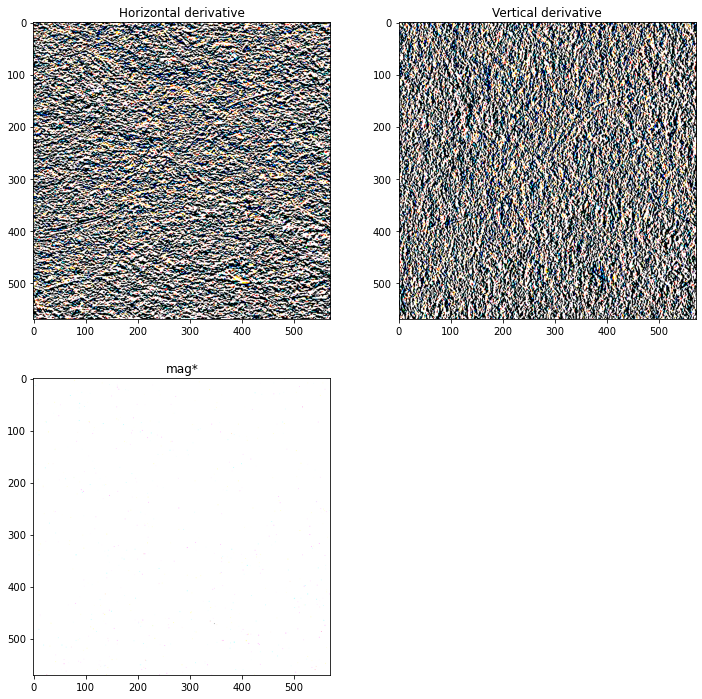

In [178]:
fig = plt.figure(figsize=(12, 12))
  
# setting values to rows and column variables
rows = 2
columns =2 

fig.add_subplot(rows, columns, 1)

plt.imshow(dx)
plt.axis('on')
plt.title("Horizontal derivative")


fig.add_subplot(rows, columns, 2)
plt.imshow(dy)
plt.axis('on')
plt.title("Vertical derivative")

fig.add_subplot(rows, columns, 3)
plt.imshow(mag)
plt.axis('on')
plt.title("mag*")
